<a href="https://colab.research.google.com/github/dakyommii/study/blob/main/test/trainTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import glob
import time
import PIL.Image as Image
from tqdm.notebook import tqdm
from itertools import chain
from collections import OrderedDict
import random

import torch
import torch.nn as nn
import torchvision.utils as vutils
import torchvision.datasets as dset
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pylab as plt
import ipywidgets
from IPython import display

In [ ]:
if not os.path.exists('./horse2zebra'):
  import gdown
  url = 'https://drive.google.com/uc?id=1jPelB2jzNZJq3ZU9Uk_Mkt4MJtF3DRgg'
  gdown.download(url, './horse2zebra.zip', quiet=False)
  !unzip ./horse2zebra.zip > /dev/null

In [ ]:
if torch.cuda.is_available():
    print("The code will run on GPU.")
else:
    print("The code will run on CPU. Go to Edit->Notebook Settings and choose GPU as the hardware accelerator")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

The code will run on GPU.


In [ ]:
import shutil, sys 
shutil.move("/content/horse2zebra/train/A", "/content/horses_train/A")
shutil.move("/content/horse2zebra/train/B", "/content/zebra_train/B")
shutil.move("/content/horse2zebra/test/A", "/content/horses_test/A")
shutil.move("/content/horse2zebra/test/B", "/content/zebra_test/B")

FileNotFoundError: ignored

torch.Size([5, 3, 256, 256])


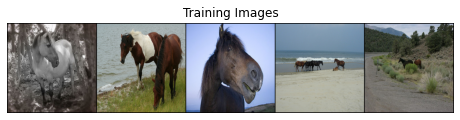

In [ ]:
bs = 5
workers = 2
image_size = (256,256)
dataroot = 'horses_train/'
dataset_horses_train = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0, 0, 0), (1, 1, 1)),
                              ]))
dataloader_train_horses = torch.utils.data.DataLoader(dataset_horses_train, batch_size=bs,
                                         shuffle=True, num_workers=workers)
real_batch = next(iter(dataloader_train_horses))
print(real_batch[0].shape)
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:10], padding=2, normalize=True).cpu(),(1,2,0)))

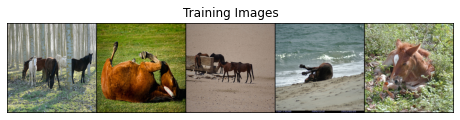

In [ ]:
dataroot = 'horses_test/'
dataset_horses_test = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0, 0, 0), (1, 1, 1)),
                              ]))
dataloader_test_horses = torch.utils.data.DataLoader(dataset_horses_test, batch_size=bs,
                                         shuffle=True, num_workers=workers)
real_batch = next(iter(dataloader_test_horses))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:10], padding=2, normalize=True).cpu(),(1,2,0)))

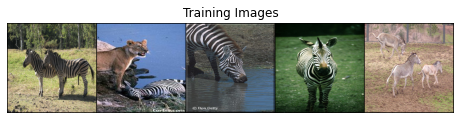

In [ ]:
dataroot = 'zebra_train'
dataset_zebra_train = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0, 0, 0), (1, 1, 1)),
                              ]))
dataloader_zebra_train = torch.utils.data.DataLoader(dataset_zebra_train, batch_size=bs,
                                         shuffle=True, num_workers=workers)
real_batch = next(iter(dataloader_zebra_train))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:10], padding=2, normalize=True).cpu(),(1,2,0)))

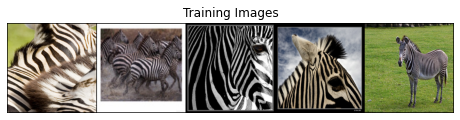

In [ ]:
dataroot = 'zebra_test'
dataset_zebra_test = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0, 0, 0), (1, 1, 1)),
                              ]))
dataloader_zebra_test = torch.utils.data.DataLoader(dataset_zebra_test, batch_size=bs,
                                         shuffle=True, num_workers=workers)
real_batch = next(iter(dataloader_zebra_test))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:10], padding=2, normalize=True).cpu(),(1,2,0)))

In [ ]:
def plot_images_test(dataloader_test_horses, dataloader_zebra_test): 
    batch_a_test = next(iter(dataloader_test_horses))[0].to(device)
    real_a_test = batch_a_test.cpu().detach()
    fake_b_test = G_A2B(batch_a_test ).cpu().detach()


    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(vutils.make_grid((real_a_test[:4]+1)/2, padding=2, normalize=True).cpu(),(1,2,0)))
    plt.axis("off")
    plt.title("Real horses")
    plt.show()

          
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(vutils.make_grid((fake_b_test[:4]+1)/2, padding=2, normalize=True).cpu(),(1,2,0)))
    plt.axis("off")
    plt.title("Fake zebras")
    plt.show()


    batch_b_test = next(iter(dataloader_zebra_test))[0].to(device)
    real_b_test = batch_b_test.cpu().detach()
    fake_a_test = G_B2A(batch_b_test ).cpu().detach()
    
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(vutils.make_grid((real_b_test[:4]+1)/2, padding=2, normalize=True).cpu(),(1,2,0)))
    plt.axis("off")
    plt.title("Real zebras")
    plt.show()


    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(vutils.make_grid((fake_a_test[:4]+1)/2, padding=2, normalize=True).cpu(),(1,2,0)))
    plt.axis("off")
    plt.title("Fake horses")
    plt.show()

In [ ]:
def plot_all_images(image_number, dataloader_test_horses, dataloader_zebra_test): 
    #generate fake zebras
    batch_a_test = next(iter(dataloader_test_horses))[0].to(device)
    real_a_test = batch_a_test.cpu().detach()
    fake_b_test = G_A2B(batch_a_test ).cpu().detach()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(vutils.make_grid((real_a_test[:image_number]+1)/2, padding=2, normalize=True).cpu(),(1,2,0)))
    plt.axis("off")
    plt.title("Real horses")
    plt.show()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(vutils.make_grid((fake_b_test[:image_number]+1)/2, padding=2, normalize=True).cpu(),(1,2,0)))
    plt.axis("off")
    plt.title("Fake zebras")
    plt.show()
    #generate fake horses
    batch_b_test = next(iter(dataloader_zebra_test))[0].to(device)
    real_b_test = batch_b_test.cpu().detach()
    fake_a_test = G_B2A(batch_b_test ).cpu().detach()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(vutils.make_grid((real_b_test[:image_number]+1)/2, padding=2, normalize=True).cpu(),(1,2,0)))
    plt.axis("off")
    plt.title("Real zebras")
    plt.show()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(vutils.make_grid((fake_a_test[:image_number]+1)/2, padding=2, normalize=True).cpu(),(1,2,0)))
    plt.axis("off")
    plt.title("Fake horses")
    plt.show()
    #identity 
    identity_a_test=G_B2A(batch_a_test.cuda() ).cpu().detach()
    identity_b_test=G_A2B(batch_b_test.cuda() ).cpu().detach()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(vutils.make_grid((identity_a_test[:image_number]+1)/2, padding=2, normalize=True).cpu(),(1,2,0)))
    plt.axis("off")
    plt.title("Identity horses")
    plt.show()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(vutils.make_grid((identity_b_test[:image_number]+1)/2, padding=2, normalize=True).cpu(),(1,2,0)))
    plt.axis("off")
    plt.title("Identity zebras")
    plt.show()
    #recovered image
    recover_a_test=G_B2A(fake_b_test.cuda()  ).cpu().detach()
    recover_b_test=G_A2B(fake_a_test.cuda()  ).cpu().detach()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(vutils.make_grid((recover_a_test[:image_number]+1)/2, padding=2, normalize=True).cpu(),(1,2,0)))
    plt.axis("off")
    plt.title("Recovered horses")
    plt.show()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(vutils.make_grid((recover_b_test[:image_number]+1)/2, padding=2, normalize=True).cpu(),(1,2,0)))
    plt.axis("off")
    plt.title("Recovered zebras")
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
def save_models(G_A2B, G_B2A, D_A, D_B, name):

  torch.save(G_A2B, "/content/gdrive/My Drive/model_proj3/"+name+"_G_A2B.pt")
  torch.save(G_B2A, "/content/gdrive/My Drive/model_proj3/"+name+"_G_B2A.pt")
  torch.save(D_A, "/content/gdrive/My Drive/model_proj3/"+name+"_D_A.pt")
  torch.save(D_B, "/content/gdrive/My Drive/model_proj3/"+name+"_D_B.pt")

def load_models( name):

  G_A2B=torch.load("/content/gdrive/My Drive/model_proj3/"+name+"_G_A2B.pt")
  G_B2A=torch.load("/content/gdrive/My Drive/model_proj3/"+name+"_G_B2A.pt")
  D_A=torch.load("/content/gdrive/My Drive/model_proj3/"+name+"_D_A.pt")
  D_B=torch.load("/content/gdrive/My Drive/model_proj3/"+name+"_D_B.pt")
  return G_A2B, G_B2A, D_A, D_B

#save_models(G_A2B, G_B2A, D_A, D_B, "test")
#G_A2B, G_B2A, D_A, D_B= load_models("test")

In [ ]:
norm_layer = nn.InstanceNorm2d
class ResBlock(nn.Module):
    def __init__(self, f):
        super(ResBlock, self).__init__()
        self.conv = nn.Sequential(nn.Conv2d(f, f, 3, 1, 1), norm_layer(f), nn.ReLU(),
                                  nn.Conv2d(f, f, 3, 1, 1))
        self.norm = norm_layer(f)
    def forward(self, x):
        return F.relu(self.norm(self.conv(x)+x))

class Generator(nn.Module):
    def __init__(self, f=64, blocks=9):
        super(Generator, self).__init__()
        layers = [nn.ReflectionPad2d(3),
                  nn.Conv2d(  3,   f, 7, 1, 0), norm_layer(  f), nn.ReLU(True),
                  nn.Conv2d(  f, 2*f, 3, 2, 1), norm_layer(2*f), nn.ReLU(True),
                  nn.Conv2d(2*f, 4*f, 3, 2, 1), norm_layer(4*f), nn.ReLU(True)]
        for i in range(int(blocks)):
            layers.append(ResBlock(4*f))
        layers.extend([
                nn.ConvTranspose2d(4*f, 4*2*f, 3, 1, 1), nn.PixelShuffle(2), norm_layer(2*f), nn.ReLU(True),
                nn.ConvTranspose2d(2*f,   4*f, 3, 1, 1), nn.PixelShuffle(2), norm_layer(  f), nn.ReLU(True),
                nn.ReflectionPad2d(3), nn.Conv2d(f, 3, 7, 1, 0),
                nn.Tanh()])
        self.conv = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.conv(x)

In [ ]:
nc=3
ndf=64
class Discriminator(nn.Module):  
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # input is (nc) x 128 x 128
            nn.Conv2d(nc,ndf,4,2,1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 64 x 64
            nn.Conv2d(ndf,ndf*2,4,2,1, bias=False),
            nn.InstanceNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 32 x 32
            nn.Conv2d(ndf*2, ndf * 4, 4, 2, 1, bias=False),
            nn.InstanceNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 16 x 16
            nn.Conv2d(ndf*4,ndf*8,4,1,1),
            nn.InstanceNorm2d(ndf*8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 15 x 15
            nn.Conv2d(ndf*8,1,4,1,1)
            # state size. 1 x 14 x 14
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
def LSGAN_D(real, fake):
  return (torch.mean((real - 1)**2) + torch.mean(fake**2))

def LSGAN_G(fake):
  return  torch.mean((fake - 1)**2)

In [ ]:
#G_A2B = Generator().to(device)
#G_B2A = Generator().to(device)
#D_A = Discriminator().to(device)
#D_B = Discriminator().to(device)

# Initialize Loss function
criterion_Im = torch.nn.L1Loss() 

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Optimizers

In [ ]:
def training(G_A2B, G_B2A, D_A, D_B,num_epochs,name,old = True):

  

  # Training Loop

  # Lists to keep track of progress
  img_list = []
  G_losses = []
  D_A_losses = []
  D_B_losses = []


  iters=0
  FDL_A2B = []
  FDL_B2A = []
  CL_A = []
  CL_B = []
  ID_B2A = []
  ID_A2B = []
  disc_A = []
  disc_B = []


  FDL_A2B_t = []
  FDL_B2A_t = []
  CL_A_t = []
  CL_B_t = []
  ID_B2A_t = []
  ID_A2B_t = []
  disc_A_t = []
  disc_B_t = []

  print("Starting Training Loop...")
  # For each epoch
  for epoch in range(num_epochs):

    # For each batch in the dataloader
    for  i,(data_horse, data_zebra) in enumerate(zip(dataloader_train_horses, dataloader_zebra_train),0):
    
        # Set model input
        a_real = data_horse[0].to(device)
        b_real = data_zebra[0].to(device)
      
        tensor_ones=torch.ones([a_real.shape[0],1,14,14]).cuda()
        tensor_zeros=torch.zeros([a_real.shape[0],1,14,14]).cuda()

        # Genrated images
        b_fake = G_A2B(a_real)
        a_rec = G_B2A(b_fake)
        a_fake = G_B2A(b_real)
        b_rec = G_A2B(a_fake)


        # Discriminator A
        optimizer_D_A.zero_grad()
        if((iters > 0 or epoch > 0) and old and iters % 3 == 0):
          rand_int = random.randint(5, old_a_fake.shape[0]-1)
          Disc_loss_A = LSGAN_D(D_A(a_real), D_A(old_a_fake[rand_int-5:rand_int].detach()))
          D_A_losses.append(Disc_loss_A.item())

        else:
          Disc_loss_A = LSGAN_D(D_A(a_real), D_A(a_fake.detach()))
          D_A_losses.append(Disc_loss_A.item())
        
        Disc_loss_A.backward()
        optimizer_D_A.step()

        
        # Discriminator B

        optimizer_D_B.zero_grad()
        if((iters > 0 or epoch > 0) and old and iters % 3 == 0):
          rand_int = random.randint(5, old_b_fake.shape[0]-1)
          Disc_loss_B =  LSGAN_D(D_B(b_real), D_B(old_b_fake[rand_int-5:rand_int].detach()))
          D_B_losses.append(Disc_loss_B.item())
        else:
          Disc_loss_B =  LSGAN_D(D_B(b_real), D_B(b_fake.detach()))
          D_B_losses.append(Disc_loss_B.item())

        Disc_loss_B.backward()
        optimizer_D_B.step()   

        # Generator

        optimizer_G_A2B.zero_grad()
        optimizer_G_B2A.zero_grad()


        # Fool discriminator
        Fool_disc_loss_A2B = LSGAN_G(D_B(b_fake))
        Fool_disc_loss_B2A = LSGAN_G(D_A(a_fake))

        # Cycle Consistency    both use the two generators
        Cycle_loss_A = criterion_Im(a_rec, a_real)*5
        Cycle_loss_B = criterion_Im(b_rec, b_real)*5

        # Identity loss
        Id_loss_B2A = criterion_Im(G_B2A(a_real), a_real)*10
        Id_loss_A2B = criterion_Im(G_A2B(b_real), b_real)*10

        # generator losses


        Loss_G = Fool_disc_loss_A2B+Fool_disc_loss_B2A+Cycle_loss_A+Cycle_loss_B+Id_loss_B2A+Id_loss_A2B
        G_losses.append(Loss_G)

        # Backward propagation
        Loss_G.backward()
        
        
        # Optimisation step
        optimizer_G_A2B.step()
        optimizer_G_B2A.step()

        FDL_A2B.append(Fool_disc_loss_A2B)
        FDL_B2A.append(Fool_disc_loss_B2A)
        CL_A.append(Cycle_loss_A)
        CL_B.append(Cycle_loss_B)
        ID_B2A.append(Id_loss_B2A)
        ID_A2B.append(Id_loss_A2B)
        disc_A.append(Disc_loss_A)
        disc_B.append(Disc_loss_B)

        if(iters == 0 and epoch == 0):
          old_b_fake = b_fake.clone()
          old_a_fake = a_fake.clone()
        elif (old_b_fake.shape[0] == bs*5 and b_fake.shape[0]==bs):
          rand_int = random.randint(5, 24)
          old_b_fake[rand_int-5:rand_int] = b_fake.clone()
          old_a_fake[rand_int-5:rand_int] = a_fake.clone()
        elif(old_b_fake.shape[0]< 25):
          old_b_fake = torch.cat((b_fake.clone(),old_b_fake))
          old_a_fake = torch.cat((a_fake.clone(),old_a_fake))

        iters += 1
        del data_zebra, data_horse, a_real, b_real, a_fake, b_fake


        if iters % 50 == 0:
      
          print('[%d/%d]\tFDL_A2B: %.4f\tFDL_B2A: %.4f\tCL_A: %.4f\tCL_B: %.4f\tID_B2A: %.4f\tID_A2B: %.4f\tLoss_D_A: %.4f\tLoss_D_A: %.4f'
                      % (epoch+1, num_epochs, Fool_disc_loss_A2B, Fool_disc_loss_B2A,Cycle_loss_A,Cycle_loss_B,Id_loss_B2A,
                          Id_loss_A2B, Disc_loss_A.item(), Disc_loss_B.item()))
        

    FDL_A2B_t.append(sum(FDL_A2B)/len(FDL_A2B))
    FDL_B2A_t.append(sum(FDL_B2A)/len(FDL_B2A))
    CL_A_t.append(sum(CL_A)/len(CL_A))
    CL_B_t.append(sum(CL_B)/len(CL_B))
    ID_B2A_t.append(sum(ID_B2A)/len(ID_B2A))
    ID_A2B_t.append(sum(ID_A2B)/len(ID_A2B))
    disc_A_t.append(sum(disc_A)/len(disc_A))
    disc_B_t.append(sum(disc_B)/len(disc_B))

    FDL_A2B = []
    FDL_B2A = []
    CL_A = []
    CL_B = []
    ID_B2A = []
    ID_A2B = []
    disc_B = []
    disc_A = []

    iters = 0             
    save_models(G_A2B, G_B2A, D_A, D_B, name)
    if (epoch % 5 == 0):
      plot_images_test(dataloader_test_horses, dataloader_zebra_test)
    #plot_all_images(4, dataloader_test_horses, dataloader_zebra_test)
  return(FDL_A2B_t,FDL_B2A_t,CL_A_t,CL_B_t,ID_B2A_t,ID_A2B_t,disc_A_t,disc_B_t)

Starting Training Loop...
[1/50]	FDL_A2B: 0.5421	FDL_B2A: 0.4662	CL_A: 0.3848	CL_B: 0.4897	ID_B2A: 0.5372	ID_A2B: 0.7416	Loss_D_A: 0.6056	Loss_D_A: 0.6476
[1/50]	FDL_A2B: 0.3055	FDL_B2A: 0.2442	CL_A: 0.3804	CL_B: 0.4401	ID_B2A: 0.5460	ID_A2B: 0.6739	Loss_D_A: 0.3770	Loss_D_A: 0.4110
[1/50]	FDL_A2B: 0.4952	FDL_B2A: 0.4705	CL_A: 0.3870	CL_B: 0.4264	ID_B2A: 0.6283	ID_A2B: 0.6171	Loss_D_A: 0.4921	Loss_D_A: 0.3346
[1/50]	FDL_A2B: 0.4554	FDL_B2A: 0.4191	CL_A: 0.4616	CL_B: 0.5391	ID_B2A: 0.7486	ID_A2B: 0.9671	Loss_D_A: 0.5213	Loss_D_A: 0.6291


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Generator. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ResBlock. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Discriminator. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


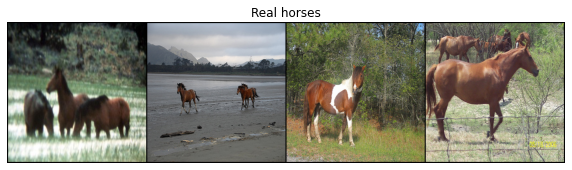

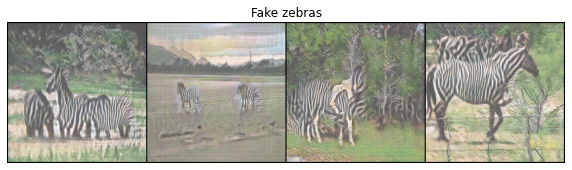

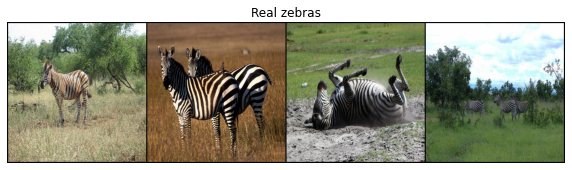

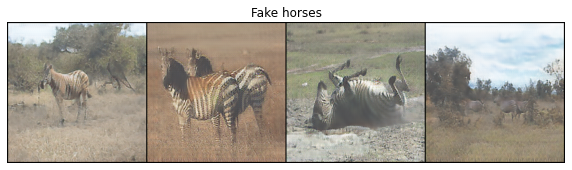

[2/50]	FDL_A2B: 0.3742	FDL_B2A: 0.4091	CL_A: 0.4301	CL_B: 0.3991	ID_B2A: 0.7255	ID_A2B: 0.6420	Loss_D_A: 0.6464	Loss_D_A: 0.5091
[2/50]	FDL_A2B: 0.3108	FDL_B2A: 0.2241	CL_A: 0.4495	CL_B: 0.4155	ID_B2A: 0.7186	ID_A2B: 0.6140	Loss_D_A: 0.5998	Loss_D_A: 0.4000
[2/50]	FDL_A2B: 0.3850	FDL_B2A: 0.4297	CL_A: 0.3629	CL_B: 0.4290	ID_B2A: 0.6353	ID_A2B: 0.7011	Loss_D_A: 0.5066	Loss_D_A: 0.4422
[2/50]	FDL_A2B: 0.4503	FDL_B2A: 0.4470	CL_A: 0.4717	CL_B: 0.4352	ID_B2A: 0.6799	ID_A2B: 0.7577	Loss_D_A: 0.6338	Loss_D_A: 0.4347
[3/50]	FDL_A2B: 0.3710	FDL_B2A: 0.4590	CL_A: 0.3366	CL_B: 0.4201	ID_B2A: 0.5743	ID_A2B: 0.6296	Loss_D_A: 0.5735	Loss_D_A: 0.6754
[3/50]	FDL_A2B: 0.2653	FDL_B2A: 0.3308	CL_A: 0.3441	CL_B: 0.4098	ID_B2A: 0.5918	ID_A2B: 0.7113	Loss_D_A: 0.4075	Loss_D_A: 0.4552
[3/50]	FDL_A2B: 0.5099	FDL_B2A: 0.4733	CL_A: 0.4896	CL_B: 0.4808	ID_B2A: 0.6977	ID_A2B: 0.6658	Loss_D_A: 0.4042	Loss_D_A: 0.6039
[3/50]	FDL_A2B: 0.6028	FDL_B2A: 0.6257	CL_A: 0.3309	CL_B: 0.4654	ID_B2A: 0.5130	ID_A2B: 0.8488	Lo

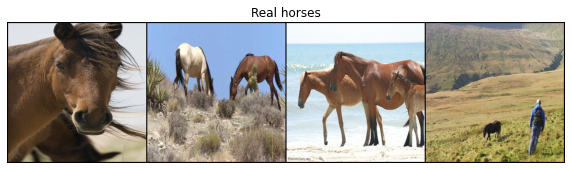

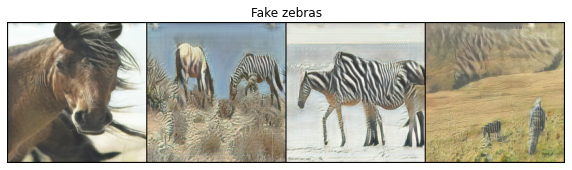

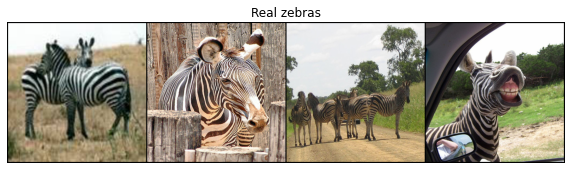

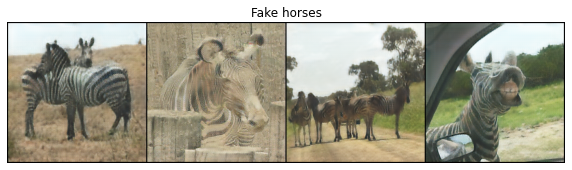

[7/50]	FDL_A2B: 0.4536	FDL_B2A: 0.4495	CL_A: 0.3400	CL_B: 0.4279	ID_B2A: 0.5130	ID_A2B: 0.6402	Loss_D_A: 0.5310	Loss_D_A: 0.4494
[7/50]	FDL_A2B: 0.1533	FDL_B2A: 0.2420	CL_A: 0.3405	CL_B: 0.3681	ID_B2A: 0.5719	ID_A2B: 0.5778	Loss_D_A: 0.4488	Loss_D_A: 0.2959
[7/50]	FDL_A2B: 0.5073	FDL_B2A: 0.4287	CL_A: 0.2880	CL_B: 0.3513	ID_B2A: 0.4853	ID_A2B: 0.5258	Loss_D_A: 0.5622	Loss_D_A: 0.3705
[7/50]	FDL_A2B: 0.5425	FDL_B2A: 0.5442	CL_A: 0.4111	CL_B: 0.3969	ID_B2A: 0.5690	ID_A2B: 0.6052	Loss_D_A: 0.4492	Loss_D_A: 0.4874
[8/50]	FDL_A2B: 0.4143	FDL_B2A: 0.4369	CL_A: 0.4090	CL_B: 0.4249	ID_B2A: 0.6687	ID_A2B: 0.5711	Loss_D_A: 0.5298	Loss_D_A: 0.3754
[8/50]	FDL_A2B: 0.3471	FDL_B2A: 0.2522	CL_A: 0.3645	CL_B: 0.4071	ID_B2A: 0.5821	ID_A2B: 0.6095	Loss_D_A: 0.4486	Loss_D_A: 0.3241
[8/50]	FDL_A2B: 0.4931	FDL_B2A: 0.3954	CL_A: 0.3856	CL_B: 0.3936	ID_B2A: 0.5987	ID_A2B: 0.6754	Loss_D_A: 0.4706	Loss_D_A: 0.3699
[8/50]	FDL_A2B: 0.4992	FDL_B2A: 0.3462	CL_A: 0.3221	CL_B: 0.3999	ID_B2A: 0.5011	ID_A2B: 0.5834	Lo

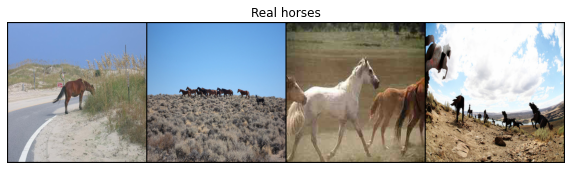

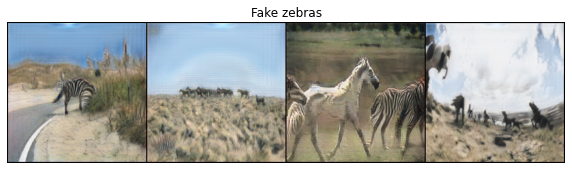

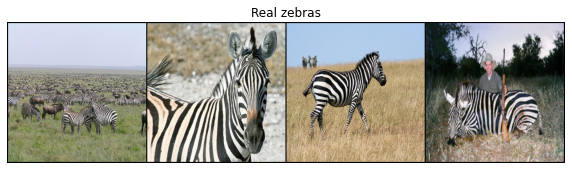

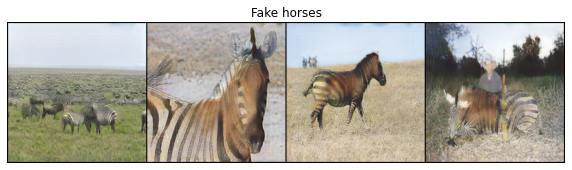

[12/50]	FDL_A2B: 0.4405	FDL_B2A: 0.3750	CL_A: 0.3661	CL_B: 0.3724	ID_B2A: 0.5868	ID_A2B: 0.5436	Loss_D_A: 0.4065	Loss_D_A: 0.3375
[12/50]	FDL_A2B: 0.3597	FDL_B2A: 0.2596	CL_A: 0.3504	CL_B: 0.3218	ID_B2A: 0.5027	ID_A2B: 0.6018	Loss_D_A: 0.4056	Loss_D_A: 0.4630
[12/50]	FDL_A2B: 0.6022	FDL_B2A: 0.4051	CL_A: 0.3958	CL_B: 0.3951	ID_B2A: 0.6551	ID_A2B: 0.5283	Loss_D_A: 0.5521	Loss_D_A: 0.2443
[12/50]	FDL_A2B: 0.5309	FDL_B2A: 0.4063	CL_A: 0.3582	CL_B: 0.4396	ID_B2A: 0.5600	ID_A2B: 0.7582	Loss_D_A: 0.4314	Loss_D_A: 0.3240
[13/50]	FDL_A2B: 0.4405	FDL_B2A: 0.3509	CL_A: 0.3638	CL_B: 0.4007	ID_B2A: 0.5935	ID_A2B: 0.5502	Loss_D_A: 0.4108	Loss_D_A: 0.3614
[13/50]	FDL_A2B: 0.4587	FDL_B2A: 0.3531	CL_A: 0.4402	CL_B: 0.4271	ID_B2A: 0.6166	ID_A2B: 0.5198	Loss_D_A: 0.3673	Loss_D_A: 0.1954
[13/50]	FDL_A2B: 0.4739	FDL_B2A: 0.4259	CL_A: 0.4214	CL_B: 0.3706	ID_B2A: 0.5652	ID_A2B: 0.5603	Loss_D_A: 0.4114	Loss_D_A: 0.4078
[13/50]	FDL_A2B: 0.4123	FDL_B2A: 0.4577	CL_A: 0.4243	CL_B: 0.4352	ID_B2A: 0.5970	ID_A2B: 0

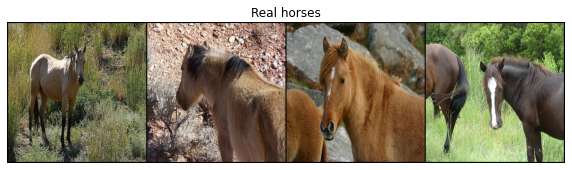

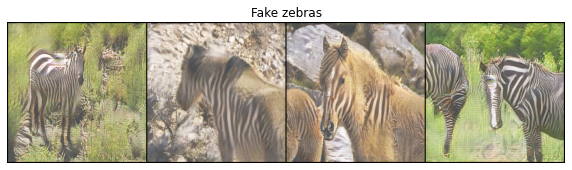

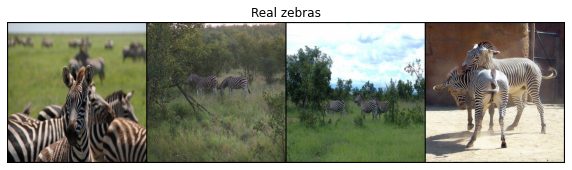

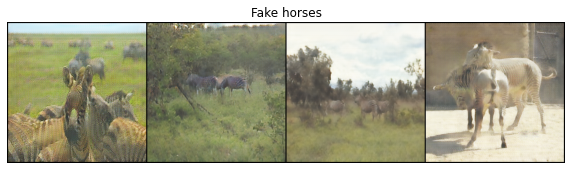

[17/50]	FDL_A2B: 0.4979	FDL_B2A: 0.3816	CL_A: 0.3421	CL_B: 0.3481	ID_B2A: 0.5833	ID_A2B: 0.5116	Loss_D_A: 0.5501	Loss_D_A: 0.3998
[17/50]	FDL_A2B: 0.3748	FDL_B2A: 0.5547	CL_A: 0.3023	CL_B: 0.3330	ID_B2A: 0.4369	ID_A2B: 0.4780	Loss_D_A: 0.2396	Loss_D_A: 0.2831
[17/50]	FDL_A2B: 0.4040	FDL_B2A: 0.4188	CL_A: 0.3024	CL_B: 0.3799	ID_B2A: 0.4815	ID_A2B: 0.5383	Loss_D_A: 0.4287	Loss_D_A: 0.4579
[17/50]	FDL_A2B: 0.5054	FDL_B2A: 0.4118	CL_A: 0.3261	CL_B: 0.3634	ID_B2A: 0.5164	ID_A2B: 0.5462	Loss_D_A: 0.4191	Loss_D_A: 0.4352
[18/50]	FDL_A2B: 0.5577	FDL_B2A: 0.4155	CL_A: 0.3191	CL_B: 0.2994	ID_B2A: 0.4511	ID_A2B: 0.5245	Loss_D_A: 0.4870	Loss_D_A: 0.4549
[18/50]	FDL_A2B: 0.3752	FDL_B2A: 0.2485	CL_A: 0.2887	CL_B: 0.3869	ID_B2A: 0.4451	ID_A2B: 0.5242	Loss_D_A: 0.3166	Loss_D_A: 0.4343
[18/50]	FDL_A2B: 0.4541	FDL_B2A: 0.5659	CL_A: 0.3172	CL_B: 0.3474	ID_B2A: 0.4816	ID_A2B: 0.4668	Loss_D_A: 0.4741	Loss_D_A: 0.3500
[18/50]	FDL_A2B: 0.5062	FDL_B2A: 0.3515	CL_A: 0.3330	CL_B: 0.4434	ID_B2A: 0.4741	ID_A2B: 0

In [ ]:
name="Basic9_old_256_training50"
#name="Basic9_training50"
#name = 'basic_training50'
epochs=20
netG_A2B, netG_B2A, netD_A, netD_B=G_A2B, G_B2A, D_A, D_B

optimizer_G_A2B = torch.optim.Adam(G_A2B.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_G_B2A = torch.optim.Adam(G_B2A.parameters(), lr=lr, betas=(beta1, 0.999))

optimizer_D_A = torch.optim.Adam(D_A.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D_B = torch.optim.Adam(D_B.parameters(), lr=lr, betas=(beta1, 0.999))

losses = training( netG_A2B, netG_B2A, netD_A, netD_B,epochs,name)

In [ ]:
name="Basic9_old_256_training50"
#name="Basic9_old_training50"
#name="Basic9_training50"
#name = 'basic_training50'
G_A2B, G_B2A, D_A, D_B = load_models(name)

In [ ]:
for i,t in dataloader_train_horses:
  break

In [ ]:
len(dataloader_train_horses)

214

In [ ]:
i[0:2] = i[2:4]

In [ ]:
sum(sum(sum(i[0] == i[2])))

tensor(49152)

In [ ]:
i.shape

torch.Size([5, 3, 128, 128])

In [ ]:
i.shape[0]

5

In [ ]:
torch.cat((i,i),0).shape

torch.Size([10, 3, 128, 128])

In [ ]:
import random
random.randint(0, 3)

0

NameError: ignored